NaN in X_train: RSI                0
Volume Multiple    0
Market cap         0
dtype: int64
NaN in X_test: RSI                0
Volume Multiple    0
Market cap         0
dtype: int64
Inf in X_train: RSI                0
Volume Multiple    0
Market cap         0
dtype: int64
Inf in X_test: RSI                0
Volume Multiple    0
Market cap         0
dtype: int64
Logistic Regression Accuracy: 0.5879230258792303


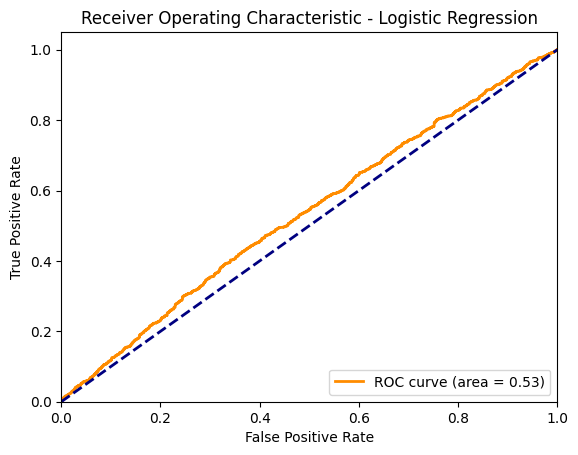

Random Forest Accuracy: 0.5411413404114134


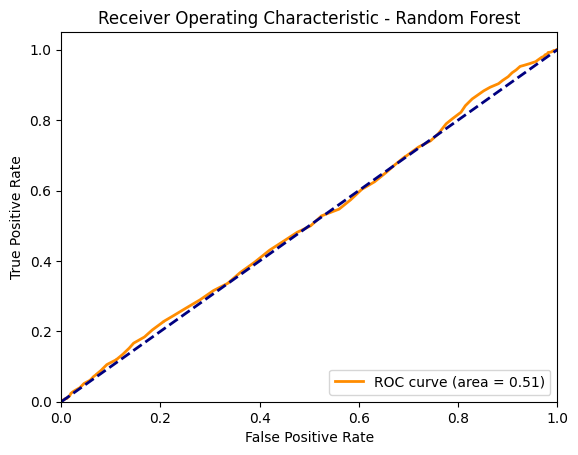

XGBoost Accuracy: 0.5610484406104844


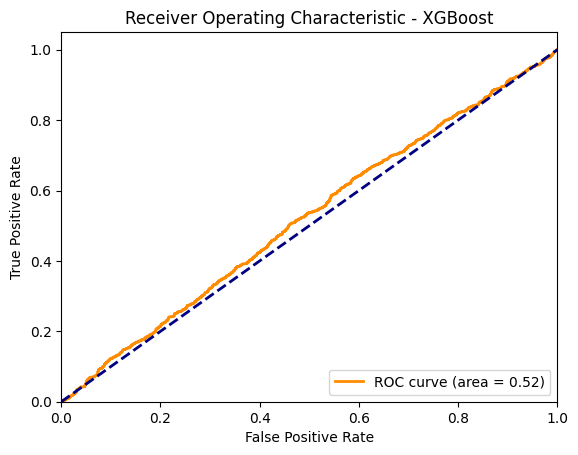

[LightGBM] [Info] Number of positive: 7219, number of negative: 4833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 12052, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.598988 -> initscore=0.401249
[LightGBM] [Info] Start training from score 0.401249
LightGBM Accuracy: 0.5743198407431984


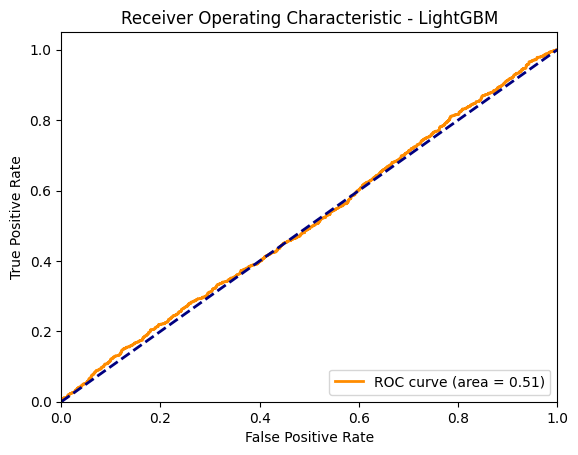

CatBoost Accuracy: 0.5783012607830126


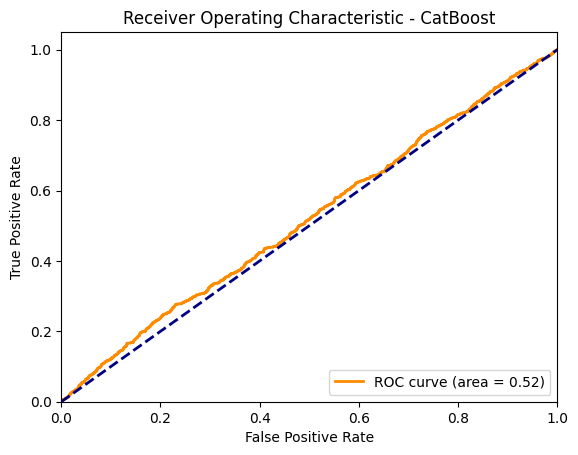

Neural Networks Accuracy: 0.5892501658925017


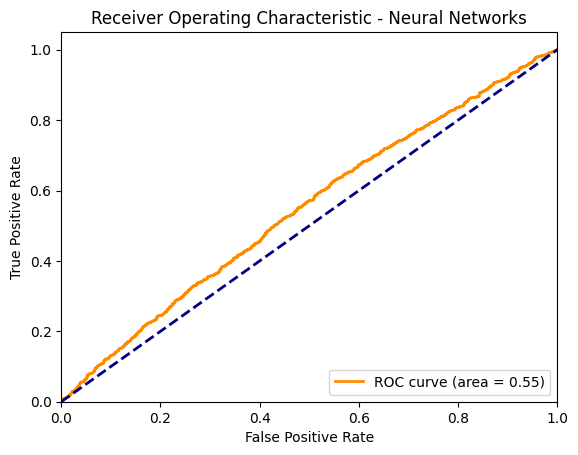

Naive Bayes Accuracy: 0.5753151957531519


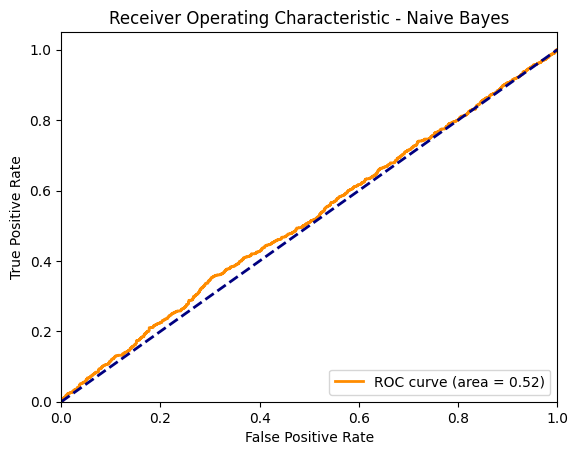

SVM Accuracy: 0.5892501658925017


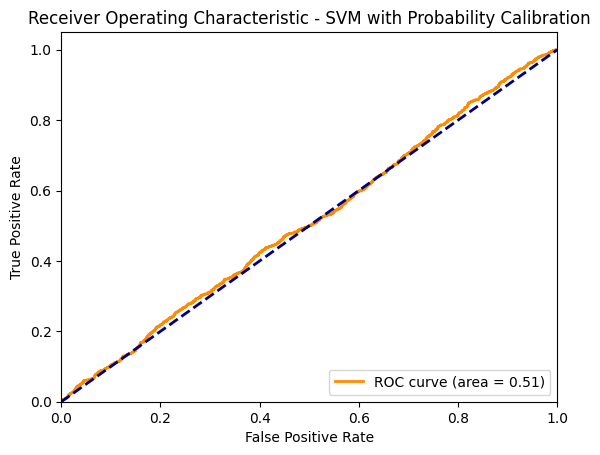

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



# Load data
file_path = 'master_data.csv'  # Change this to your file path
data = pd.read_csv(file_path)

# Convert 'Market cap' from lakhs to millions (divide by 10 to convert lakh to million)
data['Market cap'] = data['Market cap'].str.replace(',', '', regex=False).astype(float) / 10

# Convert RSI and Volume Multiple to numeric and handle non-numeric values
data['RSI'] = pd.to_numeric(data['RSI'], errors='coerce')
data['Volume Multiple'] = pd.to_numeric(data['Volume Multiple'], errors='coerce')

# Drop rows with any missing or invalid numeric values
data.dropna(subset=['RSI', 'Volume Multiple', 'Market cap'], inplace=True)

# Encode 'Trade Result' column (Profit = 1, Loss = 0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Trade Result'] = label_encoder.fit_transform(data['Trade Result'])

# Features and target variable
X = data[['RSI', 'Volume Multiple', 'Market cap']]
y = data['Trade Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for any remaining NaN or infinite values in X_train and X_test
print("NaN in X_train:", np.isnan(X_train).sum())
print("NaN in X_test:", np.isnan(X_test).sum())
print("Inf in X_train:", np.isinf(X_train).sum())
print("Inf in X_test:", np.isinf(X_test).sum())

# Replace or drop any remaining NaN or infinite values in the datasets
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Continue with the rest of your machine learning models...


# Function to plot ROC curve
def plot_roc(y_test, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
plot_roc(y_test, y_prob_lr, 'Logistic Regression')

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
plot_roc(y_test, y_prob_rf, 'Random Forest')

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
plot_roc(y_test, y_prob_xgb, 'XGBoost')

# LightGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
y_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
plot_roc(y_test, y_prob_lgbm, 'LightGBM')

# CatBoost
catboost = CatBoostClassifier(verbose=0)
catboost.fit(X_train, y_train)
y_pred_cat = catboost.predict(X_test)
y_prob_cat = catboost.predict_proba(X_test)[:, 1]
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
plot_roc(y_test, y_prob_cat, 'CatBoost')

# Neural Networks
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]
print("Neural Networks Accuracy:", accuracy_score(y_test, y_pred_mlp))
plot_roc(y_test, y_prob_mlp, 'Neural Networks')

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:, 1]
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
plot_roc(y_test, y_prob_nb, 'Naive Bayes')

# Support Vector Machines (SVM) with Probability Calibration
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
plot_roc(y_test, y_prob_svm, 'SVM with Probability Calibration')


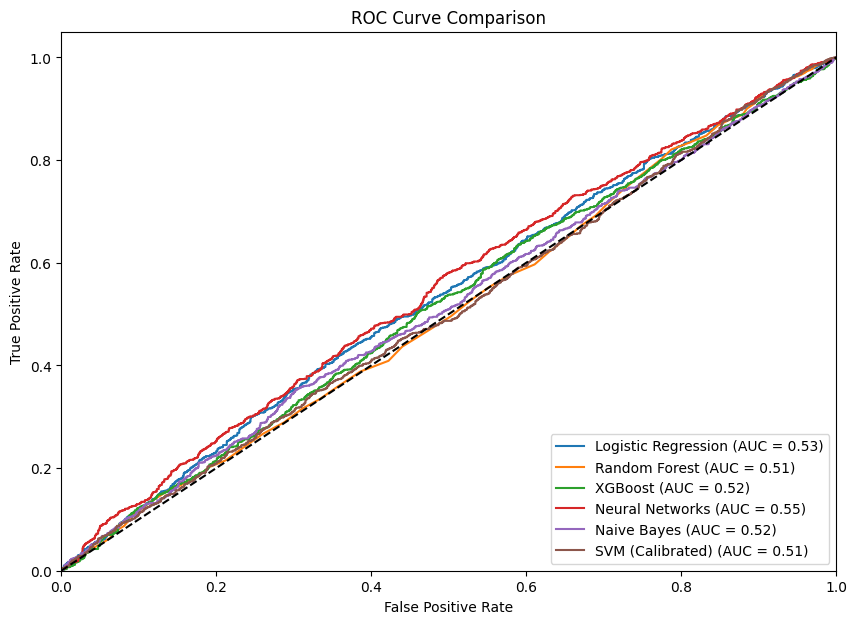

                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression  0.587923   0.589064  0.990412  0.738746  0.534546
Random Forest        0.549436   0.593849  0.740553  0.659137  0.506381
XGBoost              0.561048   0.595501  0.791314  0.679583  0.519799
Neural Networks      0.589914   0.590252  0.990412  0.739680  0.547434
Naive Bayes          0.575315   0.588446  0.924986  0.719298  0.515984
SVM (Calibrated)     0.588587   0.589821  0.987028  0.738397  0.506594


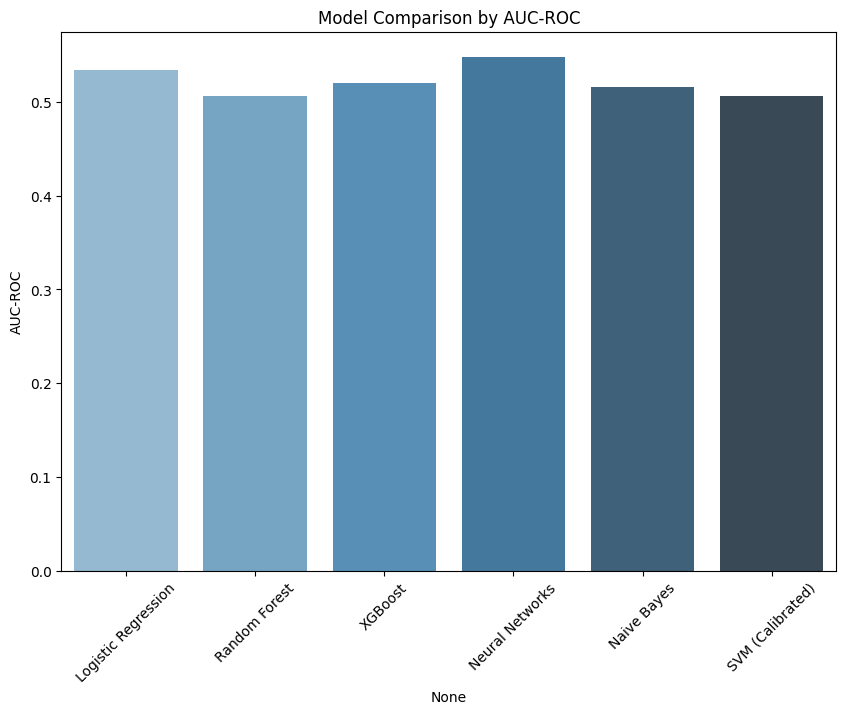

In [23]:
# Import necessary libraries for models and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store model results
results = {}

# Helper function to evaluate model performance
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    
    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'AUC-ROC': auc_roc}
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    return fpr, tpr, auc_roc

# Train and evaluate Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
fpr_logreg, tpr_logreg, auc_logreg = evaluate_model("Logistic Regression", logreg, X_test, y_test)

# Train and evaluate Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
fpr_rf, tpr_rf, auc_rf = evaluate_model("Random Forest", rf, X_test, y_test)

# Train and evaluate XGBoost
# Train and evaluate XGBoost without the 'use_label_encoder' parameter
xgb = XGBClassifier(eval_metric='logloss')  # Removed 'use_label_encoder'
xgb.fit(X_train, y_train)
fpr_xgb, tpr_xgb, auc_xgb = evaluate_model("XGBoost", xgb, X_test, y_test)


# Train and evaluate Neural Networks (MLPClassifier)
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)
fpr_mlp, tpr_mlp, auc_mlp = evaluate_model("Neural Networks", mlp, X_test, y_test)

# Train and evaluate Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
fpr_nb, tpr_nb, auc_nb = evaluate_model("Naive Bayes", nb, X_test, y_test)

# Train and evaluate SVM with probability calibration
svm = SVC(probability=True)
calibrated_svm = CalibratedClassifierCV(svm, method='sigmoid')
calibrated_svm.fit(X_train, y_train)
fpr_svm, tpr_svm, auc_svm = evaluate_model("SVM (Calibrated)", calibrated_svm, X_test, y_test)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'Neural Networks (AUC = {auc_mlp:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (Calibrated) (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Print model comparison results
results_df = pd.DataFrame(results).T
print(results_df)

# Plot the comparison of metrics
plt.figure(figsize=(10, 7))
sns.barplot(data=results_df, x=results_df.index, y="AUC-ROC", palette="Blues_d")
plt.title("Model Comparison by AUC-ROC")
plt.xticks(rotation=45)
plt.show()


                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression  0.595940   0.595940  1.000000  0.746820  0.528238
Random Forest        0.556296   0.603093  0.747206  0.667459  0.534475
XGBoost              0.561370   0.602990  0.772751  0.677397  0.521420
Neural Networks      0.597526   0.600131  0.972858  0.742335  0.548198
Naive Bayes          0.412940   0.580460  0.053752  0.098393  0.511057
SVM (Calibrated)     0.595623   0.596424  0.994146  0.745560  0.511305
Voting Classifier    0.590866   0.598726  0.950506  0.734677  0.539300


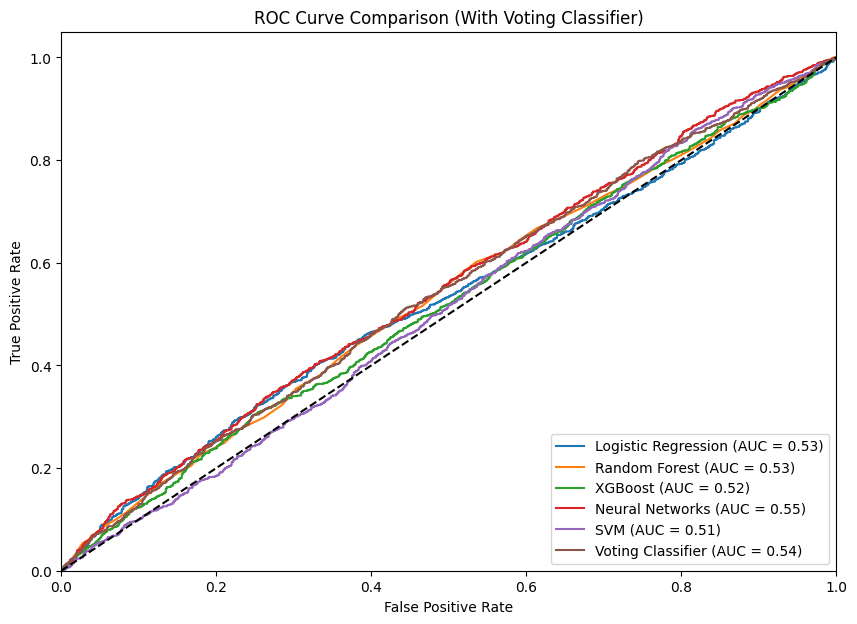

In [3]:
from sklearn.ensemble import VotingClassifier

# Define individual models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
xgb = XGBClassifier(eval_metric='logloss')
mlp = MLPClassifier(max_iter=1000)
svm = CalibratedClassifierCV(SVC(probability=True))

# Create a Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', logreg), 
        ('rf', rf), 
        ('xgb', xgb), 
        ('mlp', mlp), 
        ('svm', svm)
    ],
    voting='soft'  # Use soft voting to account for predicted probabilities
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate the Voting Classifier
fpr_voting, tpr_voting, auc_voting = evaluate_model("Voting Classifier", voting_clf, X_test, y_test)

# Print updated results
results["Voting Classifier"] = {
    'Accuracy': accuracy_score(y_test, voting_clf.predict(X_test)),
    'Precision': precision_score(y_test, voting_clf.predict(X_test)),
    'Recall': recall_score(y_test, voting_clf.predict(X_test)),
    'F1 Score': f1_score(y_test, voting_clf.predict(X_test)),
    'AUC-ROC': roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])
}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Plot updated ROC curve including the Voting Classifier
plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'Neural Networks (AUC = {auc_mlp:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {auc_voting:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (With Voting Classifier)')
plt.legend(loc="lower right")
plt.show()



In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter space for Neural Networks (MLP)
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (50,50), (100,100)],  # Different layer sizes
    'activation': ['tanh', 'relu'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimizers
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # L2 regularization term
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
    'max_iter': [500, 1000, 1500]  # Maximum iterations
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Perform Randomized Search with 5-fold cross-validation
mlp_random = RandomizedSearchCV(mlp, mlp_param_grid, n_iter=10, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
mlp_random.fit(X_train, y_train)

# Evaluate the tuned Neural Network model
fpr_mlp_tuned, tpr_mlp_tuned, auc_mlp_tuned = evaluate_model("Tuned Neural Network", mlp_random, X_test, y_test)

# Collect the results
results["Tuned Neural Network"] = {
    'Accuracy': accuracy_score(y_test, mlp_random.predict(X_test)),
    'Precision': precision_score(y_test, mlp_random.predict(X_test)),
    'Recall': recall_score(y_test, mlp_random.predict(X_test)),
    'F1 Score': f1_score(y_test, mlp_random.predict(X_test)),
    'AUC-ROC': roc_auc_score(y_test, mlp_random.predict_proba(X_test)[:, 1])
}

# Display results for the tuned Neural Network
results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1 Score,AUC-ROC
Logistic Regression,0.587923,0.589064,0.990412,0.738746,0.534546
Random Forest,0.549436,0.593849,0.740553,0.659137,0.506381
XGBoost,0.561048,0.595501,0.791314,0.679583,0.519799
Neural Networks,0.589914,0.590252,0.990412,0.739680,0.547434
Naive Bayes,0.575315,0.588446,0.924986,0.719298,0.515984
SVM (Calibrated),0.588587,0.589821,0.987028,0.738397,0.506594
Tuned Neural Network,0.587591,0.592463,0.957699,0.732054,0.546984


In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter space for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5]
}

# Initialize XGBoost classifier
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# Perform Randomized Search with 5-fold cross-validation
xgb_random = RandomizedSearchCV(xgb, xgb_param_grid, n_iter=10, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)

# Evaluate the tuned XGBoost model
fpr_xgb_tuned, tpr_xgb_tuned, auc_xgb_tuned = evaluate_model("Tuned XGBoost", xgb_random, X_test, y_test)

# Collect the results
results["Tuned XGBoost"] = {
    'Accuracy': accuracy_score(y_test, xgb_random.predict(X_test)),
    'Precision': precision_score(y_test, xgb_random.predict(X_test)),
    'Recall': recall_score(y_test, xgb_random.predict(X_test)),
    'F1 Score': f1_score(y_test, xgb_random.predict(X_test)),
    'AUC-ROC': roc_auc_score(y_test, xgb_random.predict_proba(X_test)[:, 1])
}

# Display results for the tuned XGBoost model
results_df = pd.DataFrame(results).T
results_df


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:18:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Accuracy,Precision,Recall,F1 Score,AUC-ROC
Logistic Regression,0.595940,0.595940,1.000000,0.746820,0.528238
Random Forest,0.556296,0.603093,0.747206,0.667459,0.534475
XGBoost,0.561370,0.602990,0.772751,0.677397,0.521420
Neural Networks,0.597526,0.600131,0.972858,0.742335,0.548198
Naive Bayes,0.412940,0.580460,0.053752,0.098393,0.511057
SVM (Calibrated),0.595623,0.596424,0.994146,0.745560,0.511305
Voting Classifier,0.590866,0.598726,0.950506,0.734677,0.539300
Neural Networks Tuned,0.595306,0.598562,0.974454,0.741596,0.551321
Tuned Neural Network,0.597843,0.601867,0.960617,0.740057,0.544623
Tuned XGBoost,0.596258,0.601202,0.957956,0.738765,0.537978


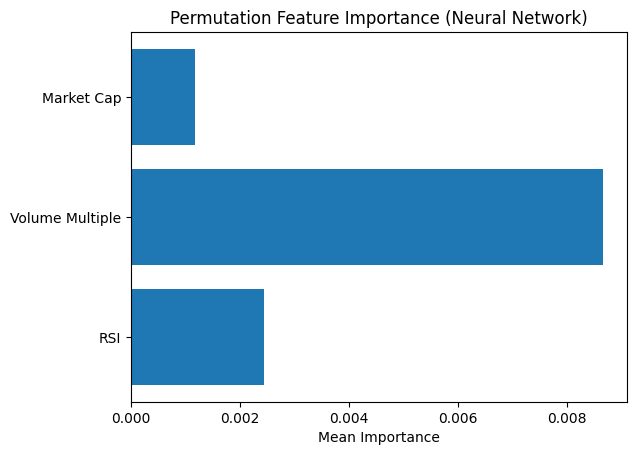

In [8]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Perform permutation importance on the tuned model
perm_importance = permutation_importance(mlp_random, X_test, y_test, n_repeats=10, random_state=42)

# Plot the feature importance
plt.barh(range(len(perm_importance.importances_mean)), perm_importance.importances_mean)
plt.yticks(range(len(perm_importance.importances_mean)), ['RSI', 'Volume Multiple', 'Market Cap'])
plt.title('Permutation Feature Importance (Neural Network)')
plt.xlabel('Mean Importance')
plt.show()
